In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

In [7]:
df = pd.read_csv('Stress-Alpha.csv')
df.head(5)

,u,v,weight,sign,SIP,SIN,SDP,SDN,Uncommon,SIPV,SINV,SDPV,SDNV,UncommonV
0,7188,1,1.0,P,0,0,0,0,1,39,2,1218,2,248
1,1,160,1.0,P,39,2,1218,2,248,0,0,18,0,2
2,1,1028,0.7,P,39,2,1218,2,248,0,0,0,0,0
3,1,309,0.5,P,39,2,1218,2,248,8,0,71,0,3
4,1,11,0.5,P,39,2,1218,2,248,295,114,2395,90,18


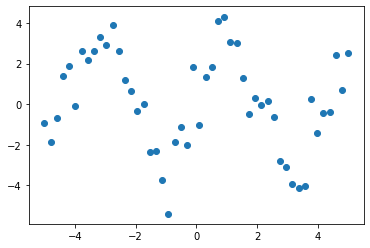

In [8]:
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [50]:
def test_func2(x, a, b, c):
    return a*((np.exp(-b * x) + c)+1)

def test_func(x, m, c, c0):
    return c0 + x**m * c

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0 = np.asarray([-1,10**5,0]))
mean = np.mean(y_data)
predicted = test_func(x_data,*params)
Error = np.array(y_data)-np.array(predicted)
SSE = np.sum(pow(Error,2))
print(SSE)
print(predicted)

C:\Users\Pooria\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

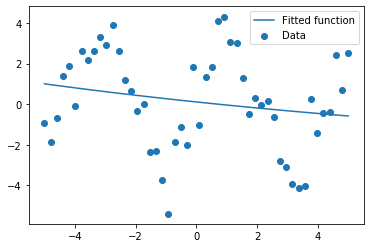

In [44]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1], params[2]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()